<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/collab_filtering_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.collab import *

In [3]:
path = untar_data(URLs.ML_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [0]:
df = pd.read_csv(path/'ratings.csv')

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(df, seed = 42)

In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors= 50, y_range=y_range)

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,1.832988,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


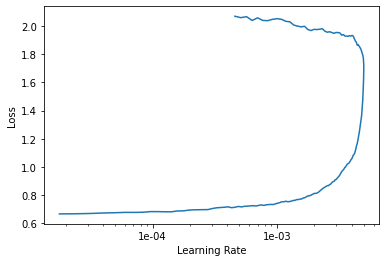

In [32]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(3, 5e-03)

epoch,train_loss,valid_loss,time
0,1.614385,0.912582,00:00
1,0.849310,0.680356,00:00
2,0.658377,0.678968,00:00


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,0.372725,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


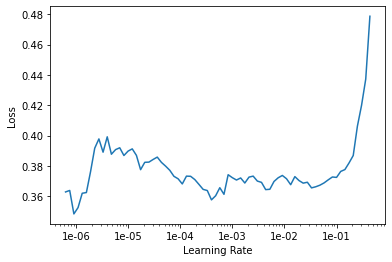

In [15]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-2')

In [23]:
learn.load('stage-1')

CollabLearner(data=TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequent

In [24]:
learn.fit_one_cycle(2, 5e-3)

epoch,train_loss,valid_loss,time
0,0.358615,0.778969,00:00
1,0.297176,0.774924,00:00


In [0]:
path = untar_data(URLs.ML_SAMPLE)

In [0]:
from google.colab import files

In [42]:
!ls

allbut.pl  mku.sh  models  README  sample_data


In [49]:
files.upload()  

{}

In [0]:
path = Path('/content')

In [46]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/mku.sh'),
 PosixPath('/content/README'),
 PosixPath('/content/u.item'),
 PosixPath('/content/allbut.pl'),
 PosixPath('/content/u.data'),
 PosixPath('/content/models'),
 PosixPath('/content/sample_data')]

In [0]:
user,item,title = 'userId','movieId','title'

In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header = None, names=[user,item,'rating','timestamp'])

In [52]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None, names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [54]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [56]:
len(movies)

1682

In [0]:
!cat u.item

In [57]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])

In [59]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [63]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, valid_pct = 0.1, item_name = 'title')
data.show_batch(5)

userId,title,target
264,"Great Dictator, The (1940)",3.0
290,Clear and Present Danger (1994),3.0
363,Star Trek III: The Search for Spock (1984),3.0
457,Ed Wood (1994),4.0
864,Swimming with Sharks (1995),4.0


In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range = y_range, wd = 1e-01)

In [69]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


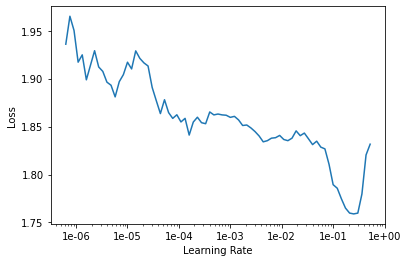

In [70]:
learn.recorder.plot(skip_end=15)

In [71]:
learn.fit_one_cycle(5, 5e-03)

epoch,train_loss,valid_loss,time
0,0.940106,0.932322,00:09
1,0.856551,0.882907,00:09
2,0.766792,0.834800,00:09
3,0.663307,0.816619,00:09
4,0.561732,0.816078,00:09


In [0]:
learn.save('dotprod')

In [73]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [74]:
len(movies)

1682

In [76]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
group_by_rating = rating_movie.groupby(title)['rating']

In [0]:
g = group_by_rating.count()

In [0]:
top_movies = g.sort_values(ascending=False)

In [0]:
top_movies = top_movies.index.values[:1000]

In [0]:
n = g.sort_values(ascending=False).index[:1000]

In [91]:
top_movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ...,
       'In the Bleak Midwinter (1995)', 'Party Girl (1995)', 'Highlander III: The Sorcerer (1994)',
       'Bastard Out of Carolina (1996)'], dtype=object)

In [93]:
movie_bias = learn.bias(top_movies, is_item = True)
movie_bias.shape

torch.Size([1000])

In [0]:
n = rating_movie.groupby(title)

In [96]:
n.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [0]:
mean_rating = rating_movie.groupby(title)['rating'].mean()

In [101]:
mean_rating.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [0]:
movie_ratings = [(b, i, mean_rating.loc[i]) for i, b in zip(top_movies, mean_rating)]

In [0]:
item0 = lambda o:o[0]

In [105]:
sorted(movie_ratings, key=item0)[:15]

[(1.0, 'Air Force One (1997)', 3.6310904872389793),
 (1.0, 'Evita (1996)', 2.9806949806949805),
 (1.0, 'Four Weddings and a Funeral (1994)', 3.6613545816733066),
 (1.0, 'Dead Poets Society (1989)', 3.9163346613545817),
 (1.0, 'Sleepless in Seattle (1993)', 3.539906103286385),
 (1.0, 'M*A*S*H (1970)', 3.912621359223301),
 (1.0, 'Postino, Il (1994)', 3.9672131147540983),
 (1.0, 'Glory (1989)', 4.076023391812866),
 (1.0, 'American President, The (1995)', 3.6280487804878048),
 (1.0, 'Right Stuff, The (1983)', 3.917197452229299),
 (1.0, 'Spawn (1997)', 2.6153846153846154),
 (1.0, 'Crash (1996)', 2.546875),
 (1.0, 'Henry V (1989)', 4.137096774193548),
 (1.0, 'Money Talks (1997)', 2.8152173913043477),
 (1.0, 'Escape from L.A. (1996)', 2.4615384615384617)]

In [0]:
movie_ratings

In [107]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(5.0, 'Full Monty, The (1997)', 3.926984126984127),
 (5.0, 'Jack (1996)', 3.142857142857143),
 (5.0, 'Shall We Dance? (1996)', 4.260869565217392),
 (5.0, 'Major Payne (1994)', 2.473684210526316),
 (4.5, 'Graduate, The (1967)', 4.104602510460251),
 (4.5, 'Glengarry Glen Ross (1992)', 3.463768115942029),
 (4.5, 'Firestorm (1998)', 2.8333333333333335),
 (4.491071428571429, 'Strictly Ballroom (1992)', 4.028846153846154),
 (4.45679012345679, 'My Left Foot (1989)', 3.8512396694214877),
 (4.344, 'Return of the Jedi (1983)', 4.007889546351085),
 (4.333333333333333, 'While You Were Sleeping (1995)', 3.549382716049383),
 (4.333333333333333, 'Portrait of a Lady, The (1996)', 2.68),
 (4.292929292929293, 'Welcome to the Dollhouse (1995)', 3.7232142857142856),
 (4.283292978208232, 'Before Sunrise (1995)', 3.4081632653061225),
 (4.262626262626263, 'Powder (1995)', 3.2083333333333335)]

In [0]:
movie_w = lear